In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz
import pandas as pd
import numpy as np

Завантажимо датасет **"iris"**:

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = iris.data
y = iris.target

Розділимо датасет на тренувальний та тестовий датасети:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Створимо модель і запустимо її навчання:

In [5]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=4, max_depth=4, min_samples_leaf=5 )

In [6]:
clf_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=4)

Виконаємо прогноз та оцінимо його якість:

In [7]:
y_predict = clf_model.predict(X_test)

In [8]:
metrics.accuracy_score(y_test, y_predict)

0.9555555555555556

Візуалізуємо дерево ухвалення рішень:

In [9]:
target = list(iris.target_names)
feature_names = iris.feature_names

In [10]:
dot_data = tree.export_graphviz(clf_model, feature_names=feature_names, class_names=target)

In [11]:
graph = graphviz.Source(dot_data)

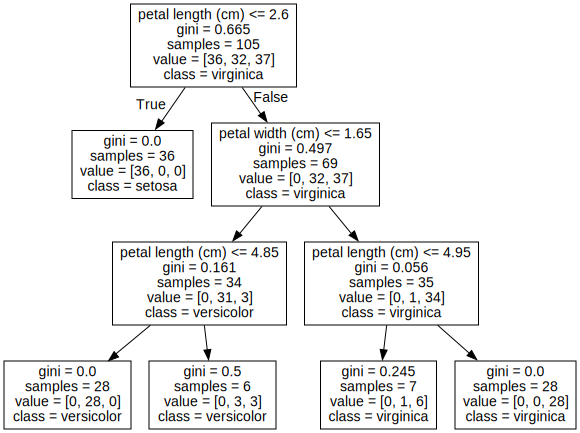

In [12]:
graph

Розрахуємо значимість параметрів та відобразимо їх:

In [13]:
importances = clf_model.feature_importances_
importances

array([0.        , 0.        , 0.58703896, 0.41296104])

Відобразимо більш наглядно значимість параметрів, відсортувавши їх від найбільшого до найменшого:

In [14]:
sorted_importances = pd.DataFrame({'feature': list(iris.feature_names),
                                   'importance': clf_model.feature_importances_}).\
                                   sort_values('importance', ascending=False)
sorted_importances

,feature,importance
2,petal length (cm),0.587039
3,petal width (cm),0.412961
0,sepal length (cm),0.000000
1,sepal width (cm),0.000000
